In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("Partner_Business_Modeling.csv")
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


In [57]:
df['Accept Rate in %'] = df['Accept Rate'].str.strip('%').astype('int')
df.drop('Accept Rate', inplace= True, axis = 1)

In [58]:
df['Accept Rate in %']

0      100
1       83
2      100
3      100
4       76
      ... 
114    100
115     71
116     88
117     78
118     86
Name: Accept Rate in %, Length: 119, dtype: int32

In [59]:
df.describe()

,Trips Completed,Supply Hours,Rating,Accept Rate in %
count,119.000000,119.000000,119.000000,119.000000
mean,11.941176,7.084034,4.698571,85.092437
std,5.857480,2.794000,0.406876,18.833792
min,1.000000,1.000000,1.600000,19.000000
25%,8.000000,5.000000,4.600000,77.000000
50%,12.000000,7.000000,4.800000,91.000000
75%,15.000000,9.000000,4.900000,100.000000
max,31.000000,11.000000,5.000000,100.000000


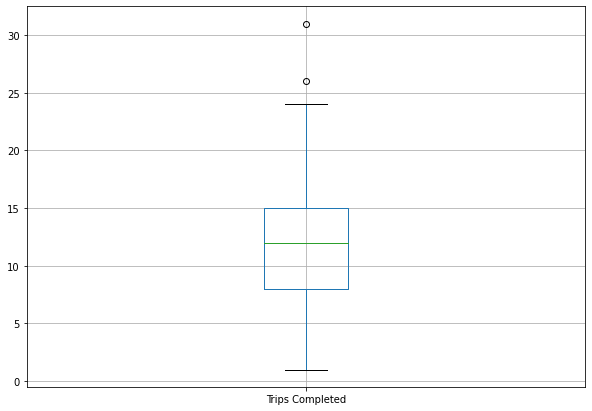

In [60]:
_ = df.boxplot(column = "Trips Completed", figsize = (10,7))

In [61]:
##How much would the total bonus payout be with Option 1?

In [62]:
df1 = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'] >= 10) & (df['Rating'] >= 4.7) & (df['Accept Rate in %'] >= 90)]
df1

,Name,Trips Completed,Supply Hours,Rating,Accept Rate in %
11,Byron,15,10,4.9,100
12,Carlota,14,8,5.0,100
19,Dannette,14,9,4.9,100
23,Demetrius,14,9,5.0,100
26,Dimple,15,10,4.9,100
32,Emil,12,9,5.0,100
37,Garth,15,10,5.0,100
40,Hanh,14,9,4.9,94
53,Keshia,20,11,4.8,100
57,Latonia,13,9,5.0,100


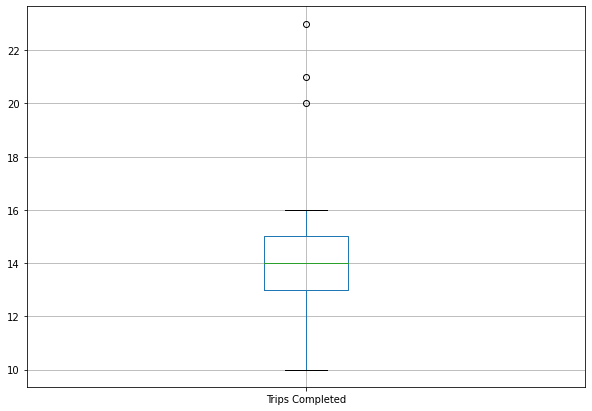

In [63]:
_ = df1.boxplot(column = "Trips Completed", figsize = (10,7))

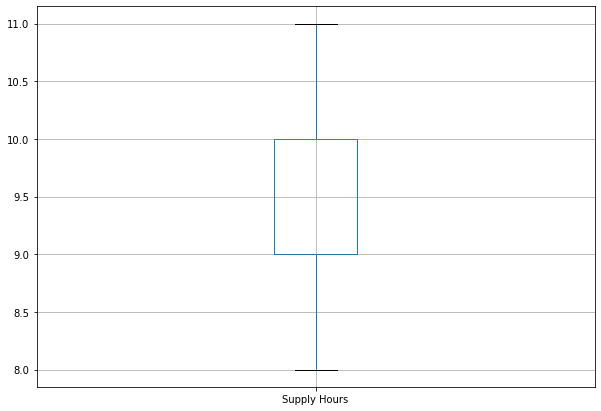

In [64]:
_ = df1.boxplot(column = "Supply Hours", figsize = (10,7))

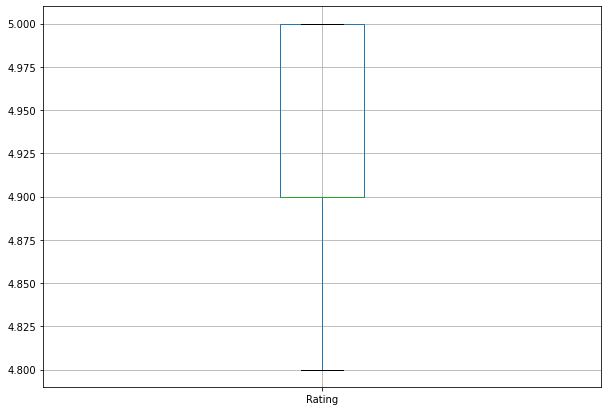

In [65]:
_ = df1.boxplot(column = "Rating", figsize = (10,7))

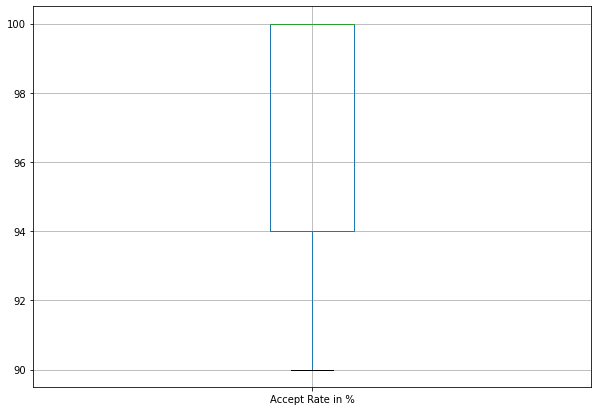

In [66]:
_ = df1.boxplot(column = "Accept Rate in %", figsize = (10,7))

In [67]:
option_1 = len(df1) * 50
option_1

1050

In [68]:
# Option 2: $4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.

In [69]:
df2 = df[(df['Trips Completed'] >= 12) & (df['Rating'] >= 4.7)]

In [70]:
len(df2)

46

In [71]:
df2 = df2.drop_duplicates(subset = ['Name','Trips Completed','Supply Hours','Rating','Accept Rate in %'] )

In [72]:
len(df2)

46

In [73]:
option_2 = 4 * (df2['Trips Completed'].sum())

In [74]:
option_2

2976

In [75]:
# 3.How many drivers would qualify for a bonus under Option 1 but not under Option 2?

In [76]:
df3 = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'] >= 10) & (df['Trips Completed'] < 12) & (df['Rating'] >= 4.7) & (df['Accept Rate in %'] >= 90)]
diff_option1 = len(df3)
df3

,Name,Trips Completed,Supply Hours,Rating,Accept Rate in %
88,Oren,11,9,4.8,91
92,Phyllis,10,8,4.8,90


In [80]:
#second option
df3 = df1.merge(df2, on = df1.columns.to_list(), how = "left", indicator = True)
df3
# included by only option 1
df3[df3["_merge"] == 'left_only']

,Name,Trips Completed,Supply Hours,Rating,Accept Rate in %,_merge
16,Oren,11,9,4.8,91,left_only
17,Phyllis,10,8,4.8,90,left_only


In [ ]:
# 4.What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

In [ ]:
df4 = df[(df['Trips Completed'] < 10) & (df['Rating'] >= 4.7) & (df['Accept Rate in %'] < 90)]
percentage = len(df4)/len(df) * 100
percentage

In [ ]:
# Scenario 2
# How much money (after expenses) does the taxi driver make per year without partnering with Uber?

In [ ]:
total_weeks_per_year = 52
weeks_off = 3
fare_per_day = 200 
workday_per_week = 6
total_months_per_year = 12
# expenses
gas_per_week = 200
insurance_per_month = 400
vehicle_rent_by_week = 500

In [ ]:
total_expenses = (gas_per_week + vehicle_rent_by_week) * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
print("$"+str(total_expenses))

In [ ]:
total_revenue = (total_weeks_per_year - weeks_off) * workday_per_week * fare_per_day
print("$"+str(total_revenue))

In [ ]:
profit_margin = (total_revenue - total_expenses) / total_revenue
print(str(round(profit_margin * 100, 2)) + "%")

In [ ]:
# Question 6

# calculate new expenses
gas_per_week = gas_per_week * 1.05
insurance_per_month = insurance_per_month * 0.8
new_car = 40000

new_total_expenses = new_car + gas_per_week * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
print("$"+str(new_total_expenses))

In [ ]:
# profit margin is the total revenue from previous question minus new expenses
new_profit_margin = (total_revenue - new_total_expenses) / total_revenue
print(str(round(new_profit_margin * 100, 2)) + "%")

In [ ]:
# calculate the weekly fare increase
fare_increase = total_revenue * (profit_margin - new_profit_margin) / (total_weeks_per_year - weeks_off)
print("$"+str(round(fare_increase, 2)))